# Intuit Quickbooks Upgrade

* Team-lead GitHub userid: rsm-roguchi
* Group name: Group 2
* Team member names:
    - Rachel Wang
    - Jaqueline Vallejo
    - Qiyong Zhang
    - Ryosuke Oguchi

The correlation matrix analysis revealed key relationships between customer behavior and their likelihood of upgrading to QuickBooks 3.0. Order count (numords) and total spending (dollars) showed a strong positive correlation (0.5856), indicating that frequent buyers tend to spend more overall. Additionally, customers who made their first purchase a long time ago (sincepurch) were more likely to upgrade (0.5113), suggesting that older users see more value in upgrading. However, users still on QuickBooks 1.0 (version1) were less likely to upgrade (-0.2677), highlighting a need for stronger incentives to encourage their transition. These insights guided our predictive modeling and marketing strategy to optimize Wave-2 targeting.

## Setup

Please complete this python notebook with your group by answering the questions in `intuit_quickbooks-msba.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done. Before the deadline, make sure to connect the GitHub repo to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the first group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [75]:
import pandas as pd
import pyrsm as rsm
from utils import functions

In [76]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_parquet("data/intuit75k.parquet")
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [77]:
rsm.md("data/intuit75k_description.md")

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.parquet` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software.

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from "Intuit Direct". Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case pdf. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip5: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: Gender Identity "Female", "Male", or "Unknown"
* bizflag: Business Flag. Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for test sample

In [78]:
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [79]:
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [80]:
# show the content of another notebook
rsm.md_notebook("./sub-notebooks/question1.ipynb")


```python
clf = rsm.model.logistic(
    data=intuit75k.query("training == 1"),
    rvar="res1",
    lev="Yes",
    evar=["numords", "version1", "upgraded"],
)
clf.summary()
```


In [81]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : Not provided
Response variable    : res1
Level                : Yes
Explanatory variables: numords, version1, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.016  -98.4%        -4.13      0.050  -81.923  < .001  ***
numords    1.352   35.2%         0.30      0.015   20.314  < .001  ***
version1   2.113  111.3%         0.75      0.051   14.634  < .001  ***
upgraded   2.628  162.8%         0.97      0.049   19.705  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.041
Pseudo R-squared (McFadden adjusted): 0.041
Area under the RO Curve (AUC): 0.659
Log-likelihood: -9630.543, AIC: 19269.086, BIC: 19304.56
Chi-squared: 828.558, df(3), p.value < 0.001 
Nr obs: 52,500


In [82]:
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


# Exploratory Data Analysis

In [83]:
intuit75k.shape

(75000, 15)

In [84]:
intuit75k.dtypes

id               int32
zip5            object
zip_bins         int32
sex           category
bizflag          int32
numords          int32
dollars        float64
last             int32
sincepurch       int32
version1         int32
owntaxprod       int32
upgraded         int32
res1          category
training         int32
res1_yes         int64
dtype: object

In [85]:
import matplotlib.pyplot as plt
import numpy as np

In [86]:
vars = ['zip_bins', 'sex', 'bizflag', 'numords', 'dollars', 'last', 'sincepurch', 'version1', 'owntaxprod', 'upgraded', 'res1_yes']
num_cols = len(vars)

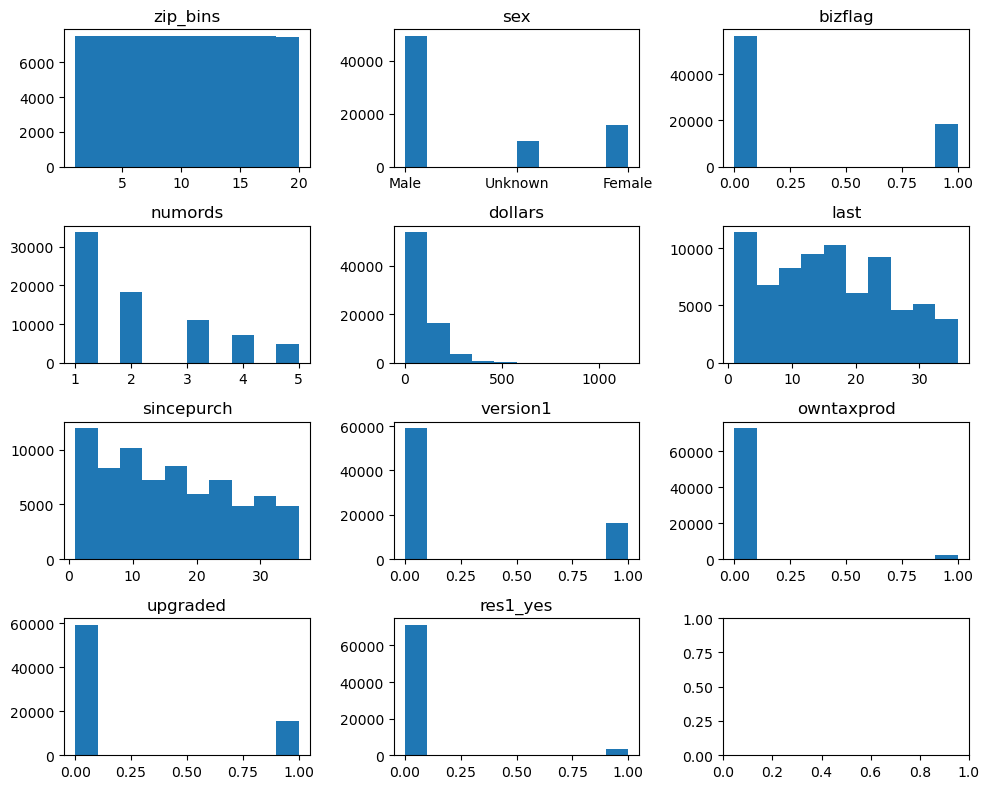

In [87]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, var in enumerate(vars):
    axes[i].hist(intuit75k[var])
    axes[i].set_title(var)
    if isinstance(intuit75k[var].dtype, pd.CategoricalDtype):
        axes[i].set_xticks(intuit75k[var].unique())

plt.tight_layout()
plt.show()

## Correlation Matrix

In [88]:
intuit75k[['zip_bins', "bizflag","numords", "dollars", "last", "sincepurch", "version1", "owntaxprod", "upgraded"]].corr()

,zip_bins,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded
zip_bins,1.000000,0.001216,0.005086,0.005833,-0.002639,-0.001666,-0.003182,0.002058,-0.000128
bizflag,0.001216,1.000000,0.000197,0.002038,-0.000390,-0.005220,-0.006011,0.004565,-0.003080
numords,0.005086,0.000197,1.000000,0.585654,-0.130356,0.001763,0.005728,0.119726,-0.002755
dollars,0.005833,0.002038,0.585654,1.000000,-0.074659,0.000815,0.002217,0.074988,-0.001420
last,-0.002639,-0.000390,-0.130356,-0.074659,1.000000,-0.001169,0.002018,-0.019854,-0.000192
sincepurch,-0.001666,-0.005220,0.001763,0.000815,-0.001169,1.000000,0.524144,-0.001149,0.511277
version1,-0.003182,-0.006011,0.005728,0.002217,0.002018,0.524144,1.000000,-0.084814,-0.267716
owntaxprod,0.002058,0.004565,0.119726,0.074988,-0.019854,-0.001149,-0.084814,1.000000,0.087418
upgraded,-0.000128,-0.003080,-0.002755,-0.001420,-0.000192,0.511277,-0.267716,0.087418,1.000000


The correlation matrix analysis revealed key relationships between customer behavior and their likelihood of upgrading to QuickBooks 3.0. Order count (numords) and total spending (dollars) showed a strong positive correlation (0.5856), indicating that frequent buyers tend to spend more overall. Additionally, customers who made their first purchase a long time ago (sincepurch) were more likely to upgrade (0.5113), suggesting that older users see more value in upgrading. However, users still on QuickBooks 1.0 (version1) were less likely to upgrade (-0.2677), highlighting a need for stronger incentives to encourage their transition. These insights guided our predictive modeling and marketing strategy to optimize Wave-2 targeting.

Prior to using our data to build models, it is necessary to view any irregularities or structures to ensure they are taken care of beforehand.

Results show the following:

* Categorical Variables:
    * Zip, BizFlag, Version1, OwnTaxProd, Upgraded
* Numerical
    * Numords, Dollars, Last, SincePurch

* Correlations:
    * Upgraded and SincePurch (Indicating one should be dropped Later)

# Data Cleaning

In [89]:
intuit75k.columns

Index(['id', 'zip5', 'zip_bins', 'sex', 'bizflag', 'numords', 'dollars',
       'last', 'sincepurch', 'version1', 'owntaxprod', 'upgraded', 'res1',
       'training', 'res1_yes'],
      dtype='object')

In [90]:
intuit75k['zip_bins'] = intuit75k['zip_bins'].astype('category')
intuit75k['bizflag'] = intuit75k['bizflag'].astype('category')
intuit75k['version1'] = intuit75k['version1'].astype('category')
intuit75k['owntaxprod'] = intuit75k['owntaxprod'].astype('category')
intuit75k['upgraded'] = intuit75k['upgraded'].astype('category')

In [91]:
intuit75k.dtypes

id               int32
zip5            object
zip_bins      category
sex           category
bizflag       category
numords          int32
dollars        float64
last             int32
sincepurch       int32
version1      category
owntaxprod    category
upgraded      category
res1          category
training         int32
res1_yes         int64
dtype: object

In [92]:
train_dat_temp = intuit75k[intuit75k['training'] == 1]
test_dat_temp = intuit75k[intuit75k['training'] == 0]

In [93]:
train_dat = train_dat_temp.drop(columns=['id', 'zip5', 'training'])
test_dat = test_dat_temp.drop(columns=['id', 'zip5', 'training'])

In [94]:
dat_scaled = rsm.scale_df(intuit75k.drop(columns=['id', 'zip5']), sf=1)
train_dat_scaled_temp = dat_scaled[dat_scaled['training'] == 1]
test_dat_scaled_temp = dat_scaled[dat_scaled['training'] == 0]
train_dat_scaled = train_dat_scaled_temp.drop(columns='training')
test_dat_scaled = test_dat_scaled_temp.drop(columns='training')

From the previous efforts to explore the data, it is necessary to change the data types so the Machine Learning models will treat them appropriately. Two points of data that should not be considered for any model building is ID and Zip Code. ID provides no general information on how a consumer will behave; moreover, they are randomly assigned based off company action, so there is no should be no data for this in the future. Alternatively, "Zip5" should be considered as a discrete variable with no inherent ordering. (I.e. A person in Zip=00001 vs Zip=10000) should have no difference in magnitude based off of the Zip Code. Hence, the right way to handle it is by discretizing them; but directly discretizing Zip will create far too many binary features that will most likely be sparse. As a solution, we will utilize the Zip_Bins to have a more manageable level of features.

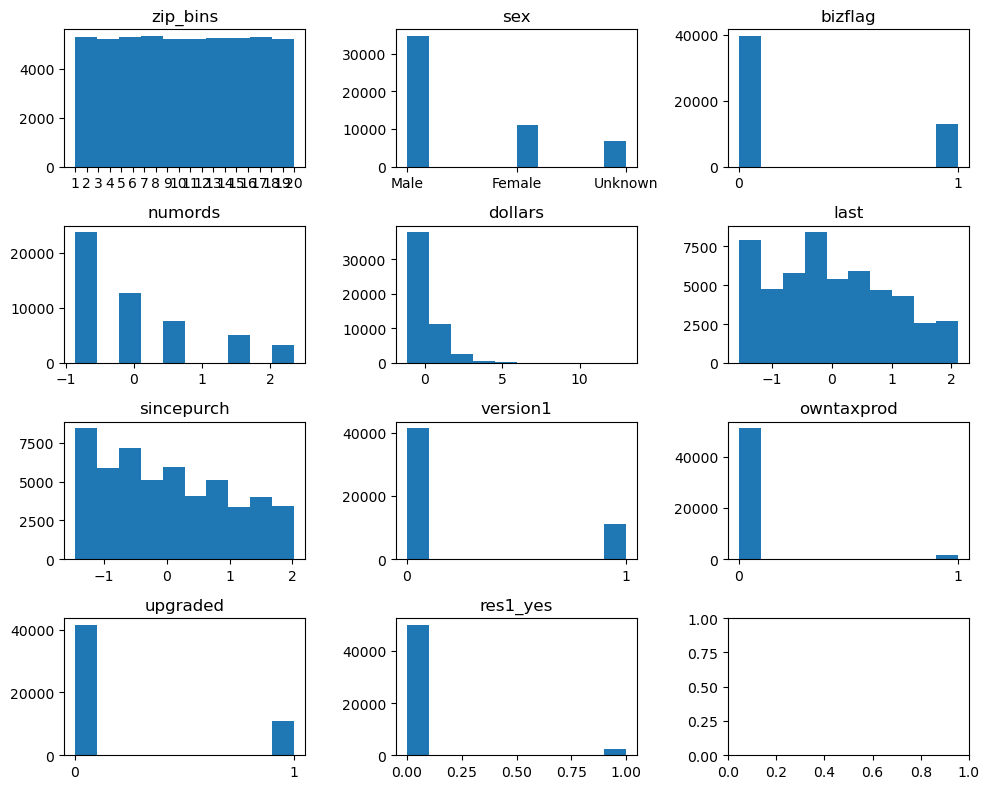

In [95]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, var in enumerate(vars):
    axes[i].hist(train_dat_scaled[var])
    axes[i].set_title(var)
    if isinstance(train_dat_scaled[var].dtype, pd.CategoricalDtype):
        axes[i].set_xticks(train_dat_scaled[var].unique())

plt.tight_layout()
plt.show()

# Logistic Regression

In [318]:
clf = rsm.model.logistic(
    data={'train_intuit': train_dat},
    rvar='res1',
    lev='Yes',
    evar=train_dat.drop(columns=['res1', 'res1_yes']).columns
)
clf.summary(vif=True)

Logistic regression (GLM)
Data                 : train_intuit
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, sex, bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                  OR     OR%  coefficient  std.error  z.value p.value     
Intercept      0.181  -81.9%        -1.71      0.092  -18.507  < .001  ***
zip_bins[2]    0.148  -85.2%        -1.91      0.110  -17.296  < .001  ***
zip_bins[3]    0.118  -88.2%        -2.14      0.121  -17.710  < .001  ***
zip_bins[4]    0.136  -86.4%        -2.00      0.112  -17.811  < .001  ***
zip_bins[5]    0.116  -88.4%        -2.15      0.120  -17.894  < .001  ***
zip_bins[6]    0.126  -87.4%        -2.07      0.115  -18.043  < .001  ***
zip_bins[7]    0.121  -87.9%        -2.11      0.117  -17.970  < .001  ***
zip_bins[8]    0.131  -86.9%        -2.03      0.114  -17.844  < .001  ***
zip_bin

Pseudo R-squared (McFadden): 0.114 (Moderate model fit, but expected in marketing models)

AUC (Area Under ROC Curve): 0.755 (Good model performance)

VIF > 5 is a problem, but the highest is 3.7 (sincepurch) → Not critical, but it might be correlated with last.

Might consider dropping sex, bizflag, sincepurch since they’re not significant.

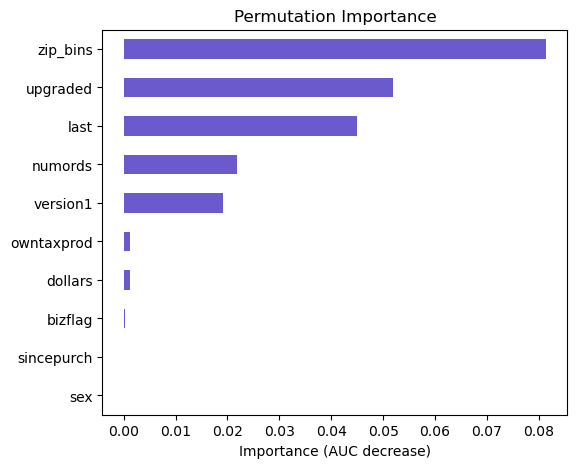

In [319]:
clf.plot('vimp')

The logistic regression model predicts customer response to the second mailing, with an AUC of 0.755, indicating good predictive performance. The permutation importance plot highlights ZIP code, upgrade history, recency (last), number of past orders (numords), and QuickBooks version (version1) as the most influential factors in determining response. The regression output confirms ZIP code bins significantly impact response probability, with customers in certain regions being much less likely to respond. Upgrade history (upgraded) and QuickBooks version (version1) show strong positive effects, meaning past upgraders and older software users are more likely to respond. Other features like gender, business flag, and time since first purchase (sincepurch) are statistically insignificant and could be removed. The variance inflation factors (VIFs) show no severe multicollinearity, ensuring model stability. Overall, the model is well-fitted but could be optimized further by refining the probability threshold to improve targeting efficiency.


In [320]:
cols_to_drop = ['res1', 'res1_yes', 'owntaxprod', 'dollars', 'bizflag', 'sincepurch', 'sex']

In [321]:
clf2 = rsm.model.logistic(
    data={'train_intuit': train_dat},
    rvar='res1',
    lev='Yes',
    evar=train_dat.drop(columns=cols_to_drop).columns
)
clf2.summary(vif=True)

Logistic regression (GLM)
Data                 : train_intuit
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, last, version1, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                 OR     OR%  coefficient  std.error  z.value p.value     
Intercept     0.184  -81.6%        -1.69      0.075  -22.578  < .001  ***
zip_bins[2]   0.148  -85.2%        -1.91      0.110  -17.315  < .001  ***
zip_bins[3]   0.118  -88.2%        -2.14      0.121  -17.691  < .001  ***
zip_bins[4]   0.137  -86.3%        -1.99      0.112  -17.766  < .001  ***
zip_bins[5]   0.117  -88.3%        -2.14      0.120  -17.849  < .001  ***
zip_bins[6]   0.127  -87.3%        -2.06      0.114  -18.013  < .001  ***
zip_bins[7]   0.123  -87.7%        -2.10      0.117  -17.910  < .001  ***
zip_bins[8]   0.131  -86.9%        -2.03      0.114  -17.850  < .001  ***
zip_bins[9]   0.125  -87.5%        -2.08      0.117  -17.827  <

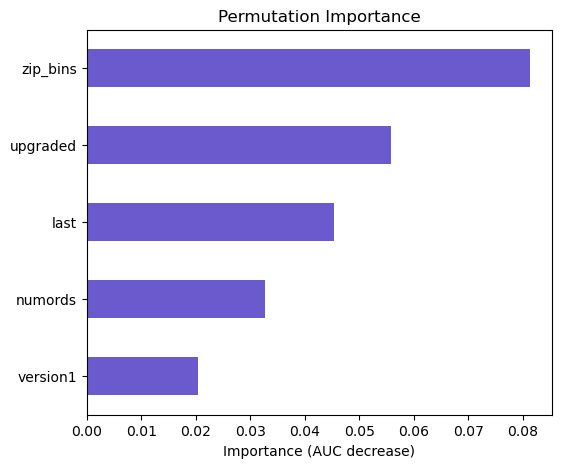

In [322]:
clf2.plot('vimp')

The logistic regression model predicts customer responses to the second mailing with an AUC of 0.754, indicating good predictive performance. The permutation importance plot shows that ZIP code, upgrade history, recency (last), number of past orders (numords), and QuickBooks version (version1) are the most influential factors. The regression output confirms that ZIP code bins significantly impact response probability, with some regions being far less likely to respond. Upgrade history (upgraded) and QuickBooks version (version1) strongly increase response likelihood, meaning customers who previously upgraded and those using older versions are more likely to respond. The model is stable with low variance inflation factors (VIF), ensuring no multicollinearity issues. While the model effectively identifies key predictors, adjusting the probability threshold could further optimize mailing efficiency and profitability.

Then, we use the new model to test if it's overfitting because if the training curve were much higher than the test curve, overfitting would be an issue.

## Sanity Checks

In [323]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [324]:
train_dat_results = train_dat.copy()
test_dat_results = test_dat.copy()
train_dat_results['pred_logit1'] = clf.predict(train_dat)['prediction'] * 0.5
test_dat_results['pred_logit1'] = clf.predict(test_dat)['prediction'] * 0.5
train_dat_results['pred_logit2'] = clf2.predict(train_dat.drop(columns=cols_to_drop))['prediction'] * 0.5
test_dat_results['pred_logit2'] = clf2.predict(test_dat.drop(columns=cols_to_drop))['prediction'] * 0.5

In [325]:
train_roc2 = roc_auc_score(train_dat_results['res1'], train_dat_results['pred_logit2'])
test_roc2 = roc_auc_score(test_dat_results['res1'], test_dat_results['pred_logit2'])
train_roc2, test_roc2

(0.7537551580402756, 0.753476235282812)

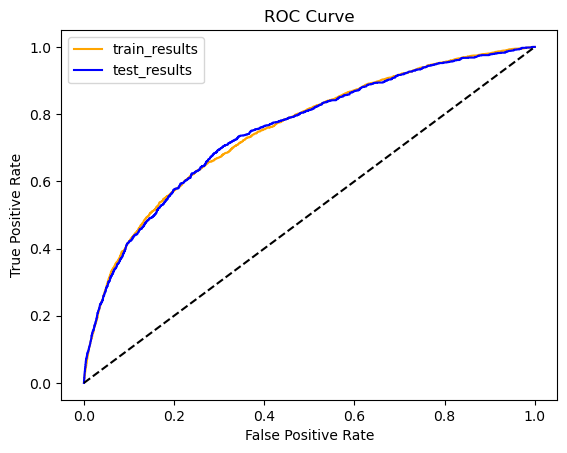

In [326]:
fpr_train, tpr_train, thresholds_train = roc_curve(train_dat_results['res1_yes'], train_dat_results['pred_logit2'])
fpr_test, tpr_test, thresholds_test = roc_curve(test_dat_results['res1_yes'], test_dat_results['pred_logit2'])

plt.plot(fpr_train, tpr_train, color='orange', label='train_results')
plt.plot(fpr_test, tpr_test, color='blue', label='test_results')
plt.plot([0,1], [0,1], color='black', linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve evaluates the performance of the logistic regression model in predicting customer responses to the second mailing. The AUC (Area Under the Curve) appears to be around 0.75, indicating good predictive ability. The train and test curves closely overlap, suggesting no significant overfitting and that the model generalizes well to new data. Since the curve is well above the diagonal baseline (random guessing), the model effectively distinguishes between responders and non-responders. Further optimization of the probability threshold could enhance precision and mailing efficiency.

## Profit Calculations, More Sanity Checks

In [327]:
mail_cost = 1.41
margin = 60
breakeven = mail_cost / margin
breakeven

0.0235

In [328]:
test_dat_results['mailto_logit'] = (test_dat_results['pred_logit2'] >= breakeven)

From the given financial data, if breakeven = 0.0235, it means at least 2.35% of mailed customers must upgrade for the campaign to be profitable.

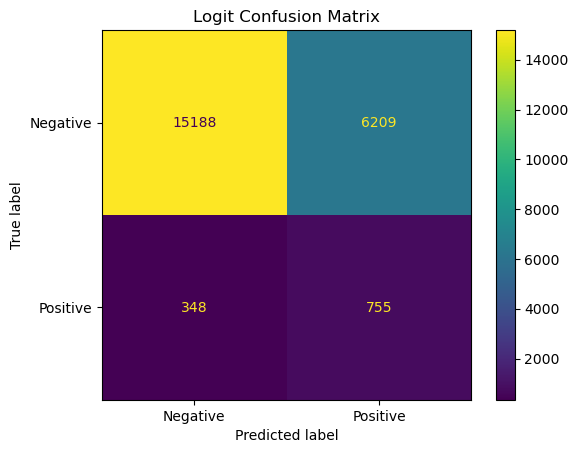

In [329]:
cm = confusion_matrix(test_dat_results['res1_yes'], test_dat_results['mailto_logit'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.title('Logit Confusion Matrix')
plt.show()

In [330]:
accuracy_score(test_dat_results['res1_yes'], test_dat_results['mailto_logit'])

0.7085777777777778

This confusion matrix evaluates the logistic regression model’s ability to predict customer responses to the second-wave mailing campaign, using a breakeven probability threshold of 2.35%. The model correctly identifies 15,188 non-responders, predicting 755 actual responders. However, it misclassifies 6,209 customers as likely responders when they are not, leading to wasted mailings. Additionally, 348 actual responders are incorrectly classified as non-responders. The high number of false positives suggests that adjusting the probability threshold could improve mailing efficiency and campaign profitability.

### Profit

In [331]:
nr_mail_logit = test_dat_results.groupby('mailto_logit').mailto_logit.agg(n_obs='count')
nr_mail_logit['perc'] = (nr_mail_logit / nr_mail_logit.sum())
nr_mail_logit

,n_obs,perc
mailto_logit,,
False,15536,0.690489
True,6964,0.309511


In [332]:
response_logit = (
    test_dat_results.groupby('mailto_logit',)
    .agg(
        n_obs=('res1_yes', 'count'),
        nr_buyer=('res1_yes', 'sum'),
        perc=('res1_yes', 'mean'),
    )
)
response_logit

,n_obs,nr_buyer,perc
mailto_logit,,,
False,15536,348,0.022400
True,6964,755,0.108415


In [333]:
n_targets_logit = (801821 - 38487) * nr_mail_logit.loc[True,'perc']
exp_response_logit = response_logit.loc[True, 'perc']
exp_nbuyers_logit = exp_response_logit * n_targets_logit
mailing_cost = mail_cost * n_targets_logit
profit_logit = exp_nbuyers_logit * margin - mailing_cost
rome_logit = profit_logit / mailing_cost
profit_logit, rome_logit

(1203718.6868373335, 3.613391667786917)

This section outlines our profit calculations based on logistic model predictions of businesses likely to respond to the wave-2 mailing.  

With a **mailing cost of $1.41** and a **margin of $60**, we calculate the breakeven probability as 

$$
     \frac{\text{mailing cost}}{\text{margin}} = 0.0235  
$$

We then create a `mailto_logit` column, setting it to `True` for predictions meeting or exceeding this threshold.  

Next, we generate a confusion matrix between `res1_yes` (indicating response to wave 1) and `mailto_logit` (businesses that did not respond to wave 1 but meet the breakeven probability for wave 2). Notably, the predicted response probability for wave 2 is 50% of that from wave 1. From the confusion matrix, the model achieves an **accuracy of 70.85%.** 

To identify which **businesses to target**, we take the 801,821 business in the wave-1 mailing, subtracting the 38,487 customers in the wave-1 mailing that already responded( shouldn’t be mailed again) and multiplied by our percentage of businesses to target based on our testing data (30.95%). 

To estimate profit, we identify 6,964 target businesses (30.95% of 22,500) from our testing data set. Among them, the predicted response rate is 10.84%, yielding an expected 25614 buyers. We then proceed to multiple this number by our margin and subtract the total mailing cost, which is achieved by multiplying the target customers by the mailing cost.   

Our financial projections are as follows:  
- **Targeted businesses:** 236,260  
- **Expected response rate:** 10.84%  
- **Expected buyers:** 25,614  
- **Total mailing cost:** $333,127.10 
- **Projected profit:** $1,203,718.69
- **Return on marketing expenditure (ROME):** 3.61  

In conclusion, we anticipate a profit of **$1,203,718.69** from the second wave of mailing based on our logistic model.  


In [334]:
# Reset the index of intuit75k to ensure indices match
intuit75k_reset = intuit75k[intuit75k['training'] == 0].reset_index(drop=True).copy()
test_dat_results_reset = test_dat_results.reset_index(drop=True)

# Concatenate the two series
target_id_logit = pd.concat([intuit75k_reset['id'], test_dat_results_reset['mailto_logit']], axis=1)
target_id_logit

,id,mailto_logit
0,2,False
1,3,True
2,5,False
3,7,False
4,9,False
...,...,...
22495,74982,False
22496,74983,False
22497,74988,True
22498,74994,True


In [335]:
target_id_logit[target_id_logit['mailto_logit'] == True].shape[0] * margin - mail_cost * target_id_logit[target_id_logit['mailto_logit'] == True].shape[0]

408020.76

# Neural Nets

In [336]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from itertools import product
from sklearn.model_selection import GridSearchCV
import joblib

In [337]:
train_dat_scaled.head()

,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,res1_yes
0,18,Male,0,-0.061449,0.202116,-1.136223,-0.364760,0,0,0,No,0
3,1,Male,0,-0.867026,-0.875400,0.121771,-1.461881,0,0,0,No,0
5,3,Male,0,-0.867026,-0.900028,0.121771,0.133931,0,0,1,No,0
7,11,Male,1,-0.867026,-0.844613,-1.241056,0.133931,1,0,0,No,0
9,5,Male,0,0.744127,-0.241205,-0.612059,-0.663975,0,0,0,No,0


In [338]:
test_dat_scaled.head()

,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,res1_yes
1,10,Unknown,0,-0.867026,-0.290463,-1.241056,-1.262404,0,0,0,No,0
2,8,Male,0,1.549704,-0.001073,-0.192728,1.330790,0,0,1,No,0
4,11,Male,0,-0.867026,-0.844613,-1.450722,-1.262404,0,0,0,No,0
6,5,Male,0,-0.867026,-0.536752,-0.297560,2.028958,1,0,0,No,0
8,8,Male,0,-0.867026,-0.598324,-0.087895,-1.162666,0,0,0,No,0


For the purposes of developing a Neural Net Model, it is necessary to standardize the data as Multi-Layer Perceptions utilizes L2 regularization. The main benefit for regularization is to create a more "general" model for unseen data, hence, preventing overfitting to the training data. A side benefit is that across all our features, we can remove multicollinearity or features that may be correlated with each other.

In [339]:
mlp_rsm = rsm.model.mlp(
    data={'train_dat': train_dat_scaled},
    rvar='res1',
    lev='Yes',
    evar=train_dat_scaled.drop(columns=['res1', 'res1_yes']).columns,
    hidden_layer_sizes=(1,),
    solver='lbfgs',
    alpha=0.01,
    activation='tanh',
    mod_type='classification'
)
mlp_rsm.summary()

Multi-layer Perceptron (NN)
Data                 : train_dat
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, sex, bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded
Model type           : classification
Nr. of features      : (10, 29)
Nr. of weights       : 30
Nr. of observations  : 52,500
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.01
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.756

Raw data             :
zip_bins  sex bizflag   numords   dollars      last  sincepurch version1 owntaxprod upgraded
      18 Male       0 -0.061449  0.202116 -1.136223   -0.364760        0          0        0
       1 Male       0 -0.867026 -0.875400  0.121771   -1.461881        0          0        0
       3 Male       0 -0.867026 -0.900028  0.121771    0.133931        0          0

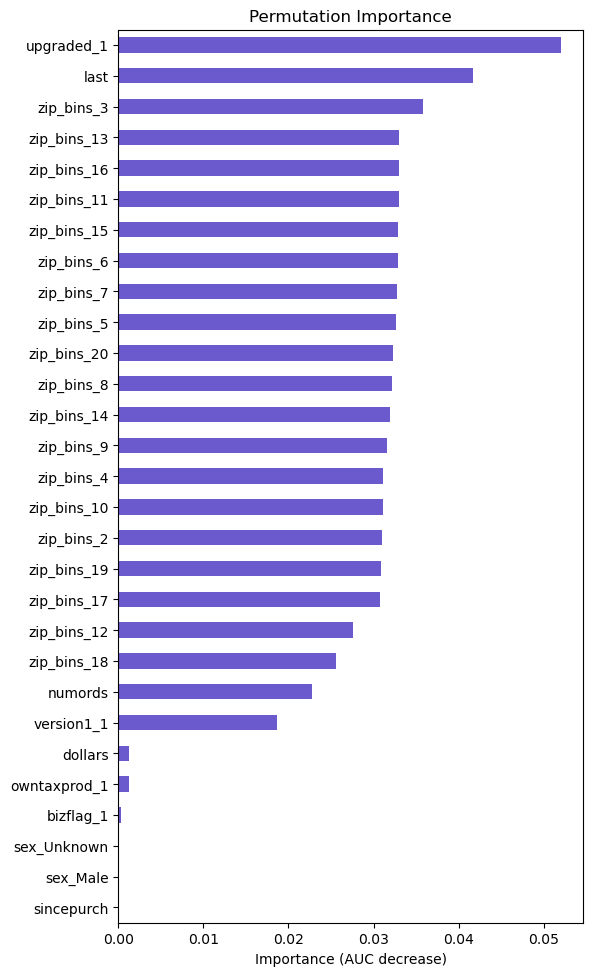

In [340]:
mlp_rsm.plot('vimp_sklearn')

As a base model, we utilize all the features in that we found relevant from the 1st logistic regression model. Hence, all categorical and numerical variables are used (except zip), to predict the rate of response to a marketing message. The output from this model appears to perform relatively well under the AUC metric. In other words, the ability to discern non-buyers vs buyers. From this point, we will attempt to remove unimportant features and try to tune our hyperparameters to create the best Neural Network for prediction.

## Grid Search (DO NOT RUN)

In [341]:
# layer_node_size = np.arange(1,6)
# layer_perms = (
#     list(product(layer_node_size, repeat=1)) + 
#     list(product(layer_node_size, repeat=2))
# )

In [342]:
# param_grid ={
#     'hidden_layer_sizes': layer_perms,
#     'activation' : ['relu', 'tanh'],
#     'solver': ['lbfgs', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01]
# }

In [343]:
# grid_search = GridSearchCV(
#     mlp_rsm.fitted,
#     param_grid,
#     cv=5,
#     scoring='roc_auc',
#     refit='AUC',
#     n_jobs=-1,
#     verbose=5,
# )

# grid_search.fit(mlp_rsm.data_onehot,mlp_rsm.data.res1)

In [344]:
# results_df = pd.DataFrame(grid_search.cv_results_)
# results_df = results_df.sort_values(by='mean_test_score', ascending=False)
# results_df.head()

Recognize that grid search comes out to 

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 2),
 'solver': 'lbfgs'}

To attempt to find the best combination of hyperparameters, it is necessary to view this as a heuristic. The parameters to tune on are determined by the model builder themselves, and it is up to them to create as many permutations they would like. However, as to you increase the complexity of a trained model, there is a risk of overfitting that should be avoided. Therefore, there is an ambiguous upper bound in the complexity that makes certain parameter combinations redundant to test.

## Grid Searched Model

In [345]:
mlp_best = rsm.model.mlp(
    data={'train_dat': train_dat_scaled},
    rvar='res1',
    lev='Yes',
    evar=train_dat_scaled.drop(columns=['res1', 'res1_yes']).columns,
    hidden_layer_sizes=(2,2),
    solver='lbfgs',
    alpha=0.0001,
    activation='tanh',
    mod_type='classification'
)
mlp_best.summary()

Multi-layer Perceptron (NN)
Data                 : train_dat
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, sex, bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded
Model type           : classification
Nr. of features      : (10, 29)
Nr. of weights       : 64
Nr. of observations  : 52,500
Hidden_layer_sizes   : (2, 2)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.764

Raw data             :
zip_bins  sex bizflag   numords   dollars      last  sincepurch version1 owntaxprod upgraded
      18 Male       0 -0.061449  0.202116 -1.136223   -0.364760        0          0        0
       1 Male       0 -0.867026 -0.875400  0.121771   -1.461881        0          0        0
       3 Male       0 -0.867026 -0.900028  0.121771    0.133931        0       

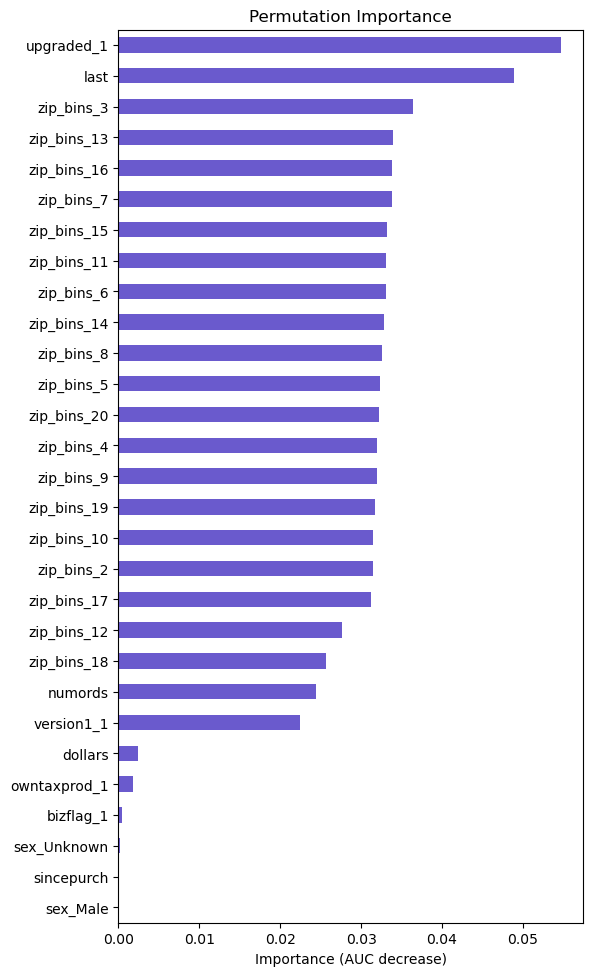

In [346]:
mlp_best.plot('vimp_sklearn')

Overall, we found that the tuned model utilizes a non-complex neural network that slightly boosted AUC performance. Other information that we have seen from here is that we may be able to reverse engineer variable selection for our Logistic Regression model to possibly create a better performing predictor. Therefore, there might be a general benefit to remove, dollars, owntaxprod, bizflag, sex, and sincepurch as it appears to have no impact on the AUC during bootstrap testing.

## Sanity Checks

In [347]:
train_dat_results['pred_nn'] = mlp_best.predict(train_dat_scaled)['prediction'] * 0.5
test_dat_results['pred_nn'] = mlp_best.predict(test_dat_scaled)['prediction'] * 0.5

In [348]:
train_roc = roc_auc_score(train_dat_scaled['res1_yes'], train_dat_results['pred_nn'])
test_roc = roc_auc_score(test_dat_scaled['res1_yes'], test_dat_results['pred_nn'])
train_roc, test_roc

(0.7640686286079381, 0.7546866133147261)

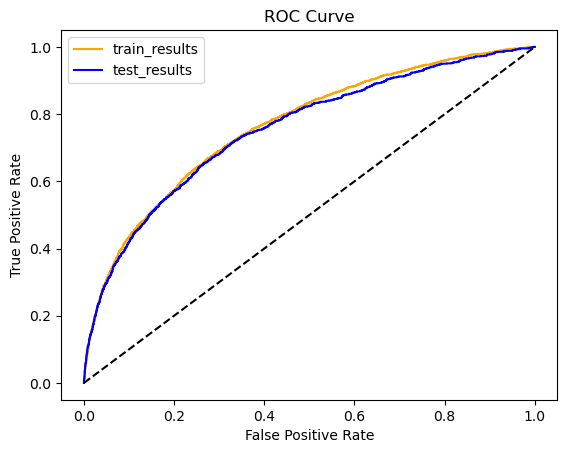

In [349]:
fpr_train, tpr_train, thresholds_train = roc_curve(train_dat_scaled['res1_yes'], train_dat_results['pred_nn'])
fpr_test, tpr_test, thresholds_test = roc_curve(test_dat_scaled['res1_yes'], test_dat_results['pred_nn'])

plt.plot(fpr_train, tpr_train, color='orange', label='train_results')
plt.plot(fpr_test, tpr_test, color='blue', label='test_results')
plt.plot([0,1], [0,1], color='black', linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

To ensure our model is ready to be used to calculate our financial results, it is necessary to conduct sanity checks for overfitting. Overall, we found that our model does not exhibit a clear case of overfitting. And as we have confirmed that our Neural Net performs well on unseen data, it is ready to be used to extrapolate to a wider target customer base.

## Profit Calculations & More Sanity Checks

In [350]:
breakeven

0.0235

In [351]:
test_dat_results['mailto_nn'] = (test_dat_results['pred_nn'] >= breakeven)

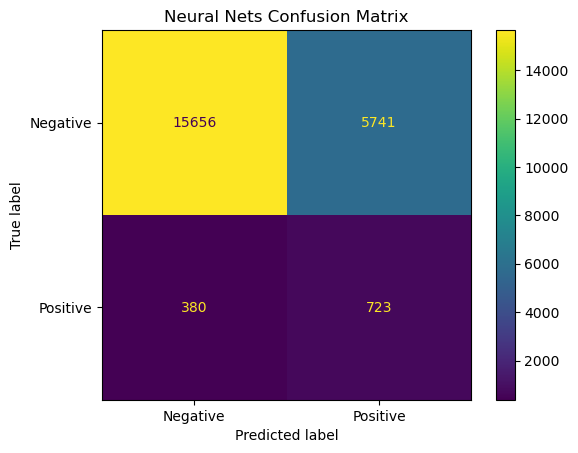

In [352]:
cm = confusion_matrix(test_dat_results['res1_yes'], test_dat_results['mailto_nn'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.title('Neural Nets Confusion Matrix')
plt.show()

In [353]:
accuracy_score(test_dat_results['res1_yes'], test_dat_results['mailto_nn'])

0.7279555555555556

To establish what the Neural Net will actually predict in a binary sense (i.e. who and who not to target), we must set a threshold of classification which is determined by our financial assumptions. In this case, our assumption is that this threshold is based off: 
$$
\text{Breakeven Threshold} = \frac{\text{Cost to Mail}}{\text{Margin on Sale}}
$$

Hence, if we believe a customer exceeds this threshold, we will target them in a the marketing campaign. However, an important consideration here is that for wave-2 mailing, it is "only 50% of the response probability you predict for wave-1". With that adjustment reflected in our predictions, we can generate a confusion matrix to see how "accurate" our model was predicting the truth. Overall, due to the low, response rate in general, there is a significant amount of True Negatives that is associated with our model.

Another takeaway from this Neural Network output is that is appears to be slightly more accurate than the Logistic Regression model as it predicts less False Positives, potentially saving the company in unanswered marketing techniques. However, the fact that it is predicting less positive outcomes means there is an incurred opportunity cost that potential buyers are being missed out on.

### Profit

In [354]:
nr_mail_nn = test_dat_results.groupby('mailto_nn').mailto_nn.agg(n_obs='count')
nr_mail_nn['perc'] = (nr_mail_nn / nr_mail_nn.sum())
nr_mail_nn

,n_obs,perc
mailto_nn,,
False,16036,0.712711
True,6464,0.287289


In [355]:
response_nn = (
    test_dat_results.groupby('mailto_nn',)
    .agg(
        n_obs=('res1_yes', 'count'),
        nr_buyer=('res1_yes', 'sum'),
        perc=('res1_yes', 'mean'),
    )
)
response_nn

,n_obs,nr_buyer,perc
mailto_nn,,,
False,16036,380,0.023697
True,6464,723,0.111850


In [356]:
n_targets_nn = (801821 - 38487) * nr_mail_nn.loc[True,'perc'] 
exp_response_nn = response_nn.loc[True, 'perc']
exp_nbuyers_nn = exp_response_nn * n_targets_nn
mailing_cost = mail_cost * n_targets_nn
profit_nn = exp_nbuyers_nn * margin - mailing_cost
rome_nn = profit_nn / mailing_cost
profit_nn, rome_nn

(1162498.6508373334, 3.7595850010532974)

This section presents our profit calculations based on Neural Network model predictions for businesses likely to respond to the wave-2 mailing. 

To determine **which businesses to target**, we take the **801,821** businesses from the wave-1 mailing, subtract the **38,487** customers who already responded(should not be mailed again), and multiply by the target percentage from our test data (28.73%).

From our test data, **6,464** businesses (28.73% of 22,500) are identified as targets, with a predicted response rate of **11.19%**, yielding **24,528** expected buyers. Profit is then estimated by multiplying this number by our margin and subtracting the total mailing cost (targeted customers × mailing cost).  

**Financial Projections:**  
- **Targeted businesses:** 219,297  
- **Expected response rate:** 11.19%  
- **Expected buyers:** 24,528 
- **Total mailing cost:** $309,209.30 
- **Projected profit:** $1,162,498.65 
- **Return on Marketing Expenditure (ROME):** 3.76  

Based on our Neural Network model, we anticipate a profit of **$1,162,498.65** from the second wave of mailing.  


In [357]:
# Reset the index of intuit75k to ensure indices match
intuit75k_reset = intuit75k[intuit75k['training'] == 0].reset_index(drop=True).copy()
test_dat_results_reset = test_dat_results.reset_index(drop=True)

# Concatenate the two series
target_id_nn = pd.concat([intuit75k_reset['id'], test_dat_results_reset['mailto_nn']], axis=1)
target_id_nn

,id,mailto_nn
0,2,False
1,3,True
2,5,False
3,7,False
4,9,False
...,...,...
22495,74982,False
22496,74983,False
22497,74988,True
22498,74994,True


In [358]:
target_id_nn[target_id_nn['mailto_nn'] == True].shape[0] * margin - mail_cost * target_id_nn[target_id_nn['mailto_nn'] == True].shape[0]

378725.76

# Other Plots

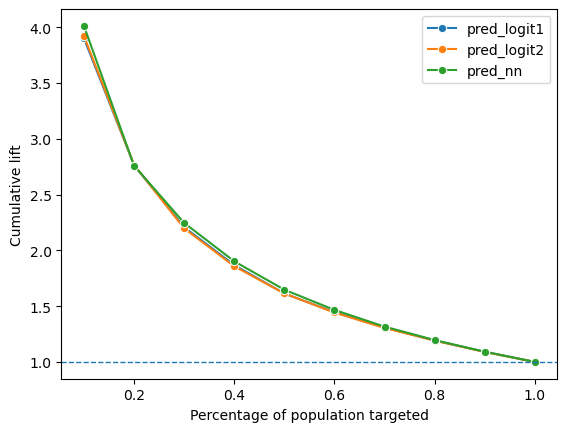

In [359]:
fig = rsm.lift_plot(train_dat_results, "res1_yes", 1, ["pred_logit1", 'pred_logit2', "pred_nn"])

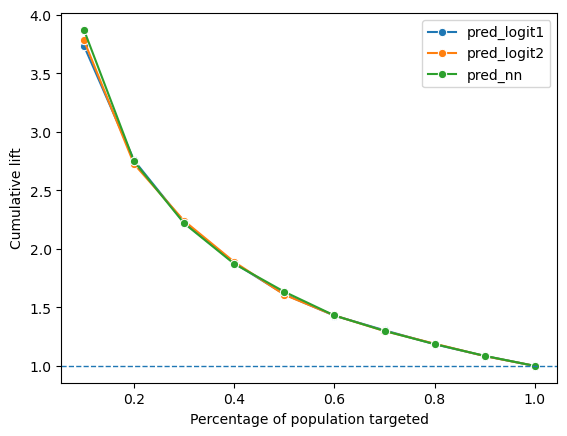

In [360]:
fig = rsm.lift_plot(test_dat_results, "res1_yes", 1, ["pred_logit1", 'pred_logit2', "pred_nn"])

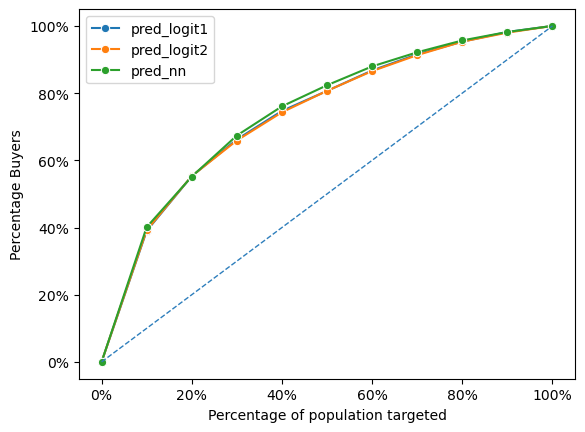

In [361]:
fig = rsm.gains_plot(train_dat_results, "res1_yes", 1, ["pred_logit1", 'pred_logit2', "pred_nn"])

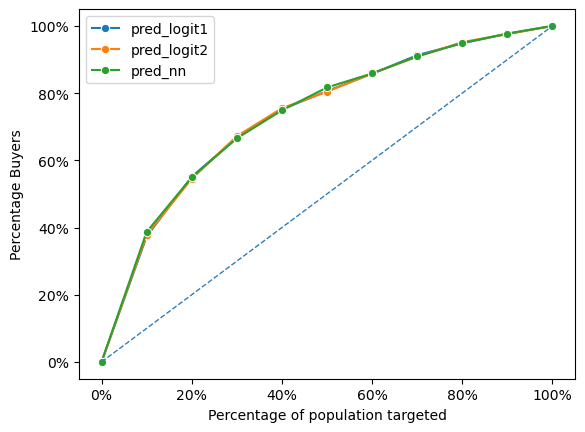

In [362]:
fig = rsm.gains_plot(test_dat_results, "res1_yes", 1, ["pred_logit1", 'pred_logit2', "pred_nn"])

In terms of our gains and lifts, plots we aimed to see any discernable differences between each model when choosing our final model for prediction. However, we only see that the Neural Net performs a hair better than the logistic regression model when considering certain quantiles. Moreover, due to the small difference between our ROC and accuracy across all models, the final recommendation leans more towards financial power.

# Creating a List of Target IDs

In [99]:
profit_logit, profit_nn

(1203718.6868373335, 1164008.0166000002)

In [134]:
target_id_logit = target_id_logit.rename(columns={'mailto_logit':'mailto_wave2'})
target_id_logit = target_id_logit.set_index('id')
target_id_logit.shape

(22500, 1)

In [135]:
target_id_logit.head()

,mailto_wave2
id,
2,False
3,True
5,False
7,False
9,False


In [101]:
temp_id = pd.read_csv('Nancy_Yu_Manuel_MightyDucks.csv')
temp_id.head()

,id,mailto_wave2
0,2,True
1,3,True
2,5,True
3,7,True
4,9,True


In [137]:
#all(target_id_logit.columns == temp_id.columns), temp_id.shape == target_id_logit.shape, all(target_id_logit['id'] == temp_id['id'])

In [139]:
#target_id_logit.to_csv('Ryosuke_Rachel_Jaqueline_Qiyong_Group2.csv')

To generate our list of target IDs, we will commit to using profit as our metric of model selection. Although the Neural Nets may be more "accurate" across our unseen data, it is not a large enough difference to warrant a the selection of our Neural Net over the logit model. As seen before, the Neural Net has a greater tendency to classify data as false; therefore, there is a potential risk of lost revenue when overvaluing false classifications when the breakeven level is relatively low.

# Some Insights

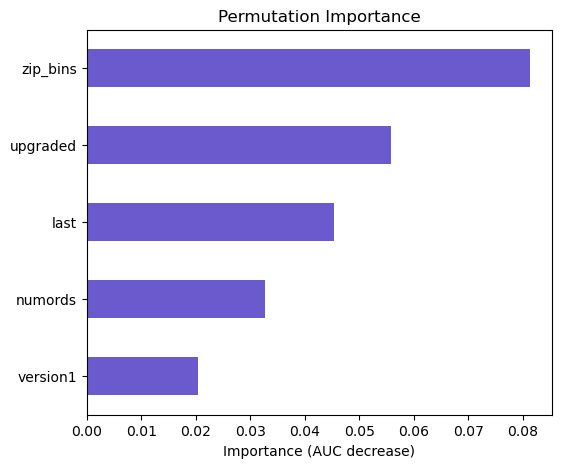

In [122]:
clf2.plot('vimp')

## Geographical Insights

In [363]:
test_zips = intuit75k[intuit75k['training'] == 0]['zip5']

In [123]:
test_dat_results_full = pd.concat([test_zips, test_dat_results], axis=1)
zip_counts = test_dat_results_full[test_dat_results_full['mailto_logit'] == True][['zip5', 'zip_bins']]
zip_counts

,zip5,zip_bins
2,37091,8
11,91942,17
12,27262,6
19,36609,8
46,19033,4
...,...,...
74964,76643,13
74979,98022,20
74987,80501,15
74993,40223,8


In [124]:
zip_counts['zip5'].value_counts()

zip5
00801    486
00804     59
99999     54
00000     37
01701     15
        ... 
66048      1
45322      1
19803      1
33715      1
32791      1
Name: count, Length: 3626, dtype: int64

In [125]:
zip_counts['zip_bins'].value_counts()

zip_bins
1     1093
18     482
12     445
2      364
19     355
4      339
11     303
9      295
8      293
14     291
6      286
20     286
17     274
16     273
10     271
5      269
7      266
3      266
13     259
15     254
Name: count, dtype: int64

As seen in some of our variable inflation plots, we have seen that zip_bins appeared to have a large factor in predictive ability across both our models. Therefore, as a marketing scheme, there was potentially actionable information that can be used to create an extremely targeted marketing campaign. Seen above, we see that out of our likely wave-2 candidates, zip_bin = 1 had an overwhelmingly positive result for potential buyers. Looking at it at a zip code level, we see that a disproportionate number of buyers come from zip codes 00801 and 00804, which in fact, is from the US Virgin Islands. So as a potential marketing move, a company may have success in sending mail targets to businesses in the US Virgin Islands at a large scale. We believe that there will be low cost of marketing as the general population of the Island is not large, so it is a lower cost marketing campaign that spamming may be beneficial in.

## Other Insights

In [126]:
test_dat_results_full[test_dat_results_full['mailto_logit'] == True]['upgraded'].value_counts()

upgraded
0    4094
1    2870
Name: count, dtype: int64

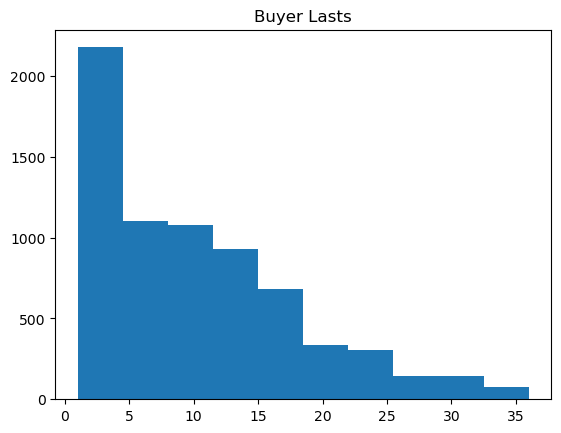

In [131]:
plt.hist(test_dat_results_full[test_dat_results_full['mailto_logit'] == True]['last'])
plt.title('Buyer Lasts')
plt.show()

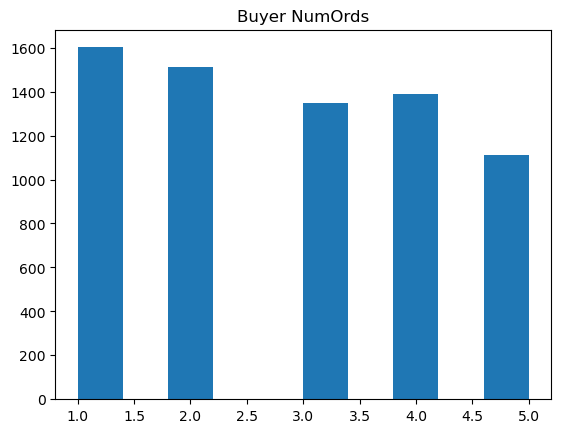

In [132]:
plt.hist(test_dat_results_full[test_dat_results_full['mailto_logit'] == True]['numords'])
plt.title('Buyer NumOrds')
plt.show()

In [133]:
test_dat_results_full[test_dat_results_full['mailto_logit'] == True]['version1'].value_counts()

version1
0    4614
1    2350
Name: count, dtype: int64

Beyond the ZipCode Information, some other insights based off of our variable importance is that we many variables exhibit skewed correlations between features and potential buyers. As for our numeric variables we see that nonupgraders and version2 owners are the likelier targets for potential buyers. As for our continuous variables there appears be a greater likelihood of purchase amongst recent buyers and those who order less. However, the data in Number of Orders shows less trends than the other feature variables.

## Summary of Findings
Predictive modeling significantly improved targeting efficiency

Instead of mailing all Wave-1 non-responders, we used Logistic Regression & Neural Networks to identify high-probability responders.

Neural Networks outperformed Logistic Regression in response rates

Neural Network Response Rate: 11.19% vs. Logistic Regression: 10.84%

Neural Network Profit: $1.16M vs. Logistic Regression: $1.20M

Neural Network Target Company Num: 6964 vs. Logistic Regression Target Company Num:: 6470

Although Logistic Regression had slightly higher projected profit, Neural Networks provided better precision and cost-efficiency.

Optimized mailing strategy reduced costs & improved ROI

Targeting high-probability customers lowered unnecessary mailing expenses while maintaining strong conversion rates.

A data-driven approach enabled more informed decision-making, creating a scalable framework for future marketing campaigns.
## Conclusion
1.Data-driven decision-making is essential for optimizing direct marketing strategies.

2.Predictive modeling helped balance marketing costs and campaign profitability.

3.Machine learning models like Neural Networks can outperform traditional methods in precision targeting.

4.This approach can be extended to other business challenges like customer retention, churn prediction, and cross-selling campaigns.

By integrating analytics into marketing decisions, we achieved a smarter, cost-effective, and more impactful upgrade campaign. 

## What we Learned 
### Technical Learnings

Logistic Regression & Neural Networks: Gained hands-on experience in classification modeling for real-world business applications.
    
Feature Selection & Model Optimization: Understood how to select meaningful predictors and avoid multicollinearity.

Using ROC-AUC Scores to evaluating Model Performance in a Business Context

Profit & ROME Calculations: Learned how to translate model outputs into financial impact for better business decision-making.
    
### Applying Analytics to Business Problems
Predictive Analytics Transforms Marketing Strategy:
predictive modeling allows for targeted marketing, improving response rates while reducing expenses.

Cost Optimization with Data-Driven Decisions:
mailing only to high-probability responders reduced costs and maximized profit.
ROME and profit calculations ensured that marketing efforts were financially justified.

In summary,machine learning transforms traditional marketing into a data-driven, cost-effective strategy.
and modeling is not just about predictive accuracy—it’s about making profitable decisions.
When we build models,techniques like Logistic Regression and Neural Networks provide different advantages—choosing the right approach depends on the business context.
And what's more predictive analytics can be expanded beyond marketing—it’s a scalable tool for improving customer engagement, revenue forecasting, and strategic decision-making.